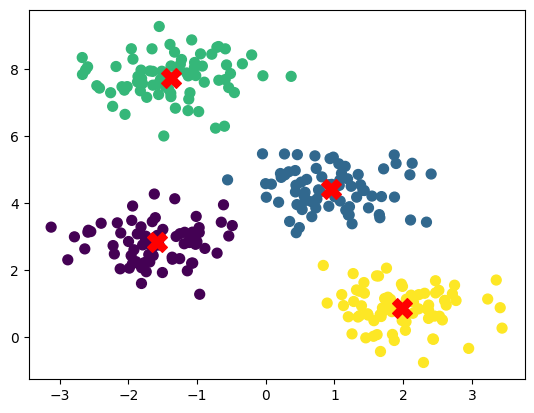

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    """Randomly initialize centroids from the dataset."""
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """Update centroids as the mean of all points assigned to each cluster."""
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(X, k, max_iters=100, tol=1e-4):
    """Perform k-means clustering."""
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels

# Example usage
if __name__ == "__main__":
    # Generate some example data
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    # Perform k-means clustering
    k = 4
    centroids, labels = kmeans(X, k)

    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
    plt.show()